sources:
- http://ravi-bhide.blogspot.in/2011/04/flajolet-martin-algorithm.html
- https://www.quora.com/What-is-the-intuition-behind-the-Flajolet-Martin-algorithm

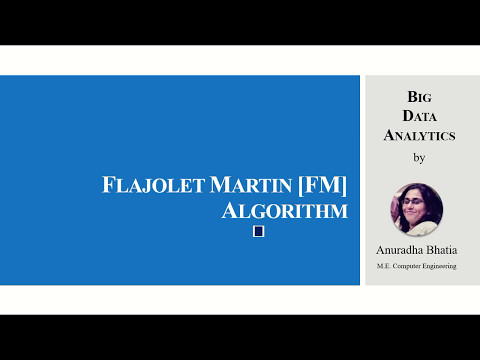

In [40]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('TG48mumSIaw')

The important property of a hash function is that when applied to the same element, it always produces the same result. 

## Intuition

If we had a good, random hash function that acted on strings and generated integers, what can we say about the generated integers? Since they are random themselves, we would expect:

If we had a **good, random hash function that acted on strings and generated integers**, what can we say about the generated integers? Since they are random themselves, we would expect:
- 1/2 of them to have their binary representation end in 0 (i.e. divisible by 2),
- 1/4 of them to have their binary representation end in 00 (i.e. divisible by 4)
- 1/8 of them to have their binary representation end in 000 (i.e. divisible by 8)
-  and in general, 1/2^n of them to have their binary representation end in 0n.

Turning the problem around, if the hash function generated an integer ending in 0^m bits (and it also generated integers ending in 0^m−1 bits, 0^m−2 bits, ..., 0^1 bits), intuitively, the number of unique strings is around 2^m.

To facilitate the above, this algorithm maintains 1 bit for each 0i seen - i.e. 1 bit for 0, another for 00, another for 000, and so on. The output of the algorithm is based on the maximum of consecutive 0^i seen.

In [50]:
elements = [1,3,2,1,2,3,4,3,1,1,2,3,1]

def hash_f(x):
    return (6*x+1)%5

def trailing_0_binary(x):
    a = bin(x).split('b')[1]
    count = 0

    for i in a[::-1]:
        if i == '0':
            count+=1
        else:
            break
    if count == len(a):
        count = 0
    return count

In [45]:
maximum = 0
for i in elements:
    zeros = trailing_0_binary(i)
    print(i, hash_f(i),zeros,bin(i),sep='\t')
    if maximum < zeros:
        maximum = zeros

1	2	0	0b1
3	4	0	0b11
2	3	1	0b10
1	2	0	0b1
2	3	1	0b10
3	4	0	0b11
4	0	2	0b100
3	4	0	0b11
1	2	0	0b1
1	2	0	0b1
2	3	1	0b10
3	4	0	0b11
1	2	0	0b1


In [46]:
distinct_elements = 2 ** maximum
distinct_elements

4

In [47]:
distinct_elements_normal = len(set(elements))
distinct_elements_normal

4

# To improve accuracy of this approximation algorithm, we do the following:


- (Averaging) Use multiple hash functions and use the average R instead.
- (Bucketing) Averages are susceptible to large fluctuations. So use multiple buckets of hash functions from the above step and use the median of the average R. This gives fairly good accuracy.
- Overall accuracy of this algorithm can be tuned by using appropriate number of hash functions in the averaging and bucketing steps. Of course, if more accuracy is desired, more hash functions need to be used, which implies higher computation cost.

In [52]:
for i in range(10):
    print(i, bin(i), trailing_0_binary(i))

0 0b0 0
1 0b1 0
2 0b10 1
3 0b11 0
4 0b100 2
5 0b101 0
6 0b110 1
7 0b111 0
8 0b1000 3
9 0b1001 0
